<h2>Perceptron</h2>
<p>Percepton got it's inspiration from biology in that neurons in the brain take inputs and produce an output if a threshold is met.</p>
<img src="../images/neuron.jpg">

<p>A mathmatical model can be presented as:</p>
<img src="../images/perceptron.png">
<p>Where the weights and biases are applied to the input features. The Sum of the products then goes through an activation function to produce an output.</p>

<h3> Linear Model</h3>
<p>To apply the weights and bias, we'll use the linear model:</p>
\begin{align}
f(w, b) = w^{T}x + b
\end{align}

<p>Where the transpose of the weights is multipied by the input feautres and the bias is added.</p>


<h3>Activiation Function</h3>
<p>The activation function can simply be, if the result is greater then 0, it will return 1, or 0 if it's less then 0.</p>
<p>Unit Step Function</p>
\begin{align}
g(\mathbf{z}) =\begin{cases}
    1 & \text{if }\mathbf{z} \ge \theta\\
    0 & \text{otherwise}.
  \end{cases}
\end{align}

<img src="../images/unit_function.jpg">

<h3>Approximation</h3>
<p>The approximate result can be written as the result of applying the activation function to the linear function:</p>
\begin{align}
\hat{y} = g(f(w, b)) = g(w^{T}x + b)
\end{align}

<h3>Update Rules</h3>
<p>For each training sample $ x_{i}$ :</p>
    
\begin{align}
\end{align}

\begin{align}
w := w + \Delta w
\end{align}
<p>New weight is the old weight plus the delta weight</p>

\begin{align}
\end{align}

\begin{align}
\Delta w:= \alpha \cdot(y_{i} - \hat{y}_{i}) \cdot x_{i}
\end{align}
<p>delta weight is the learning rate (alpha) times the difference between the actual label and the predicted label times the training sample.</p>

\begin{align}
\end{align}
<p>$\alpha  $: learning rate in [0, 1]</p>


<h3>Code the algorithm</h3>

In [1]:
import numpy as np


class Perceptron:

    def __init__(self, lr=0.01, n_iters=1000):
        #initiate and store variables
        self.lr = lr
        self.n_iters = n_iters        
        self.weights = None
        self.bias = None

        #Activation function will need a helper method
        self.activation_func = self._unit_step_func
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape #number of row is the number of samples and the number of columns is the number of features

        # init parameters at 0
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #make sure the labels only consist of classes 0 and 1
        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        #for the nubmer of iteration defined
        for _ in range(self.n_iters):
            
            #iterate over the training samples
            for idx, x_i in enumerate(X): #enumerate returns index and sample
                
                #predict linear outcomes
                linear_output = np.dot(x_i, self.weights) + self.bias
                #apply activation function to create the classes
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        #apply the linear function
        #wTx is the dot product
        linear_output = np.dot(X, self.weights) + self.bias
        #apply the activation function
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        #if input is above, 0, return 1, if it's below 0, return 0
        #using np.where will return an array with that criteria
        return np.where(x>=0, 1, 0)

<h3>Watch it in action</h3>

Accuracy 1.0


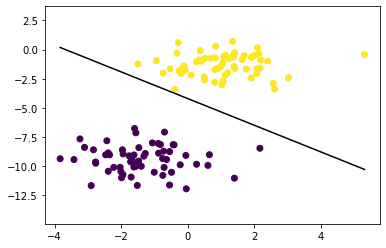

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(lr=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()